# Week 4 handin - by Sebastian Bentley (cph-sb287)

# Week 4 Exercise with Numpy

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020


## 02 Status
A possible solution was made for Exercise 1, however I did not have the time to make the optional assignment.

It seemed there might be many posible solutions for all exercises.

## 03 Solution part 1

In [46]:
import numpy as np
import matplotlib.pyplot as plt
#Open the file './data/befkbhalderstatkode.csv'
filename = '/home/jovyan/data/befkbhalderstatkode.csv'

#Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

#Using this data:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}


#Find out how many people lived in each of the 11 areas in 2015
def people_in_areas(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() 
    return sum_of_people
    
mask_2015 = (dd[:,0] == 2015)
result = np.array([people_in_areas(n, mask_2015) for n in neighb.keys()])
zip_res = zip(neighb.values(), result)

print(f'People in areas 2015:\n{dict(zip_res)}')


People in areas 2015:
{'Indre By': 51937, 'Østerbro': 75113, 'Nørrebro': 78802, 'Vesterbro/Kgs. Enghave': 61623, 'Valby': 51727, 'Vanløse': 39537, 'Brønshøj-Husum': 43908, 'Bispebjerg': 53604, 'Amager Øst': 55205, 'Amager Vest': 64967, 'Udenfor': 3872}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

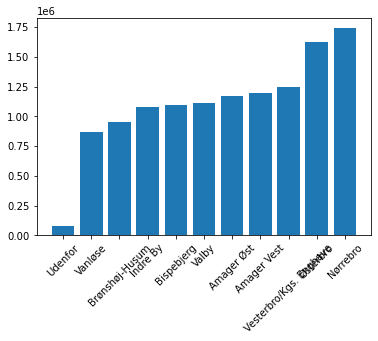

In [47]:
#Make a bar plot to show the size of each city area from the smallest to the largest
sizes = np.array([people_in_areas(n, (True)) for n in neighb.keys()])

zipped = zip(neighb.values(), sizes)
sized_dict = dict(zipped)
sorted_size= {k: v for k, v in sorted(sized_dict.items(), key=lambda item: item[1])}

plt.bar(sorted_size.keys(), sorted_size.values())
plt.xticks(rotation=45)

In [48]:
#Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
mask1 = (dd[:,0] == 2015) & (dd[:,2] > 65)
print(mask1)

print(f'People above 65 in 2015: {sum(mask1)}')

[False False False ... False False False]
People above 65 in 2015: 2639


In [49]:
#How many of those were from the other nordic countries (not dk)
mask2 = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:,3] != 5100)
print(mask2)
print(f'People above 65 in 2015 not in dk: {sum(mask2)}')

[False False False ... False False False]
People above 65 in 2015 not in dk: 2249


Text(0, 0.5, 'People')

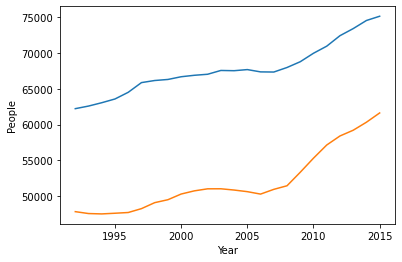

In [50]:
#Make a line plot showing the changes of number of people in vesterbro (2) and østerbro (4) from 1992 to 2015
years = range(1992, 2016)

def people_in_areas_(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() 
    return sum_of_people

vesterbro = []
østerbro = []
for y in years:
    mask = (dd[:,0] == y)
    vesterbro.append(people_in_areas(2, mask))
    østerbro.append(people_in_areas(4, mask))


plt.plot(years, vesterbro, label="Vesterbro")
plt.plot(years, østerbro)
plt.xlabel('Year')
plt.ylabel('People')
